# Latent Dirichlet Allocation (LDA)

A generative probabilistic model for topic modeling.

Key Concepts:
- Documents are a mixture of topics.
- Topics are distributions over words.

Probabilistic model based on Bayesian inference.

## 0. Setting up the evironment

Load a language model for preprocessing text in Russian

In [ ]:
!python -m spacy download ru_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("ru_core_news_sm", disable=["ner", "parser"])

A function to produce a lemmatized version of the input text

In [ ]:
def preprocessor(text):
  lemmas = list()
  doc = nlp(text)
  for token in doc:
    if token.is_alpha and token.is_stop == False:
      lemma = token.lemma_
      lemmas.append(lemma)
  return ' '.join(lemmas)

## 1. The data

In [ ]:
import pandas as pd

Read the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2024/компьютерная лингвистика/unsupervised learning/sports_articles.tsv', sep='\t')
df

,headline,summary
0,Наказание за самоуверенность: Малыхин проиграл...,Анатолий Малыхин в Бангкоке потерпел сенсацион...
1,«Находится на низком уровне»: Васильев — о ско...,Если Камила Валиева по своим физическим и мент...
2,"Победа «Спартака» в дерби, долги «Лады» по зар...",«Спартак» в третий раз обыграл ЦСКА в нынешнем...
3,«Верить ему нельзя»: глава World Athletics Коу...,Президент World Athletics Себастьян Коу сообщи...
4,Затмил дуэль Кучерова и Федотова: Капризов офо...,Кирилл Капризов трижды ассистировал партнёрам ...
...,...,...
904,Короли разделки: Большунов одержал 20-ю победу...,Александр Большунов завоевал третью золотую ме...
905,"Тримуф «Канзас-Сити» в овертайме, магия Махоум...",«Канзас-Сити» взял верх над «Сан-Франциско» в ...
906,"Хет-трик Афифа с пенальти, подачи Адингры и ка...",Катар и Кот-д'Ивуар одержали победы в финалах ...
907,«Она просто быстрее и мощнее»: Касаткина уступ...,Дарья Касаткина не завоевала титул на турнире ...


## 2. Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Feature extraction

In [ ]:
documents = df['summary'].to_list()

Build the Document-Term Matrix

In [ ]:
vectorizer = TfidfVectorizer(preprocessor=preprocessor)
X = vectorizer.fit_transform(documents)
X

<909x8434 sparse matrix of type '<class 'numpy.float64'>'
	with 45579 stored elements in Compressed Sparse Row format>

In [ ]:
dtm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
dtm

,abc,aca,add,amc,ap,aquatics,ard,asia,athletic,athletics,...,ясмин,ясмина,ясмину,ясюн,ятимова,ятимову,яхта,яхтенный,яхью,яшкин
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Dimensionality reduction techniques

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

**Latent Semantic Analysis**:


In [ ]:
lda = LatentDirichletAllocation(n_components=15, random_state=42)

X_lda = lda.fit_transform(dtm)

## 4. Topics

Display the top *n* words for each topic


In [ ]:
top_n = 10

terms = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
  print(f"Topic #{topic_idx + 1}:")
  print(" ".join([terms[i] for i in topic.argsort()[:-top_n - 1:-1]]))
  print()

Topic #1:
шоу вызов галлямов русский батраков ягудин матвей евгения фильм сафонов

Topic #2:
поддержать сказаться отметить нокаут жертва обладатель высказаться пойти опубликовать зона

Topic #3:
шевченко закрыть мишень наталия промах огневой халили эдуард круг карим

Topic #4:
сет ракетка андреев брейк медведев турнир партия гейм уступить мирра

Topic #5:
матч первый победа александр второй россия год два команда встреча

Topic #6:
футболист загитов анна куликов тарасенко казань эдмонтон побороться отметить обвинить

Topic #7:
переход дать насколько гражданство критика петербуржец fis некоторый прописать безголевую

Topic #8:
элина аванесян предыдущий источник шанхай отечественный челси восточный чжэн циньвэнь

Topic #9:
лагно чжунъи горячкин тань китаянка непомнящий лэй тинцзе гроссмейстер ян

Topic #10:
аталанта дивизион шоу этап вилла астон поделиться ди анхель брюгге

Topic #11:
тяжёлый пояс wba версия wbc смотреться фьюри усик украинец американец

Topic #12:
mma китай кучерова пре

Visualize the distribution of topics across documents

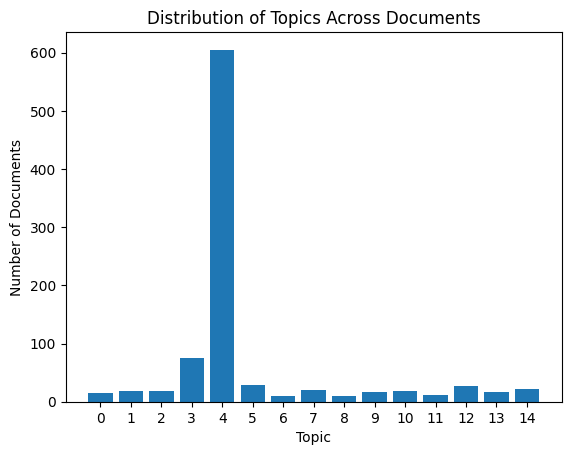

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

topic_distribution = lda.transform(X)  # Get the topic distribution for each document
document_topics = np.argmax(topic_distribution, axis=1)  # Get the most probable topic for each document

plt.hist(document_topics, bins=np.arange(lda.n_components + 1) - 0.5, rwidth=0.8)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics Across Documents')
plt.xticks(range(lda.n_components))
plt.show()